In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv("Q3_complex_linear_regression_dataset.csv")  
print(data.shape)



(300, 4)


In [25]:
# QUESTION 1: Data preprocessing
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['X3'])

# QUESTION 2: Exploratory Data Analysis
# Define features (X) and target (y)
X = data_encoded.drop(columns=['y'])
y = data['y']




            X1        X2      X3_A      X3_B      X3_C
X1    1.000000  0.072659  0.046932  0.026921  0.020971
X2    0.072659  1.000000  0.080413  0.029566  0.052100
X3_A  0.046932  0.080413  1.000000  0.491851  0.526678
X3_B  0.026921  0.029566  0.491851  1.000000  0.481087
X3_C  0.020971  0.052100  0.526678  0.481087  1.000000
List of columns to drop=  []
Size of feature set before dropping
(300, 5)
Size of feature set after dropping
(300, 5)


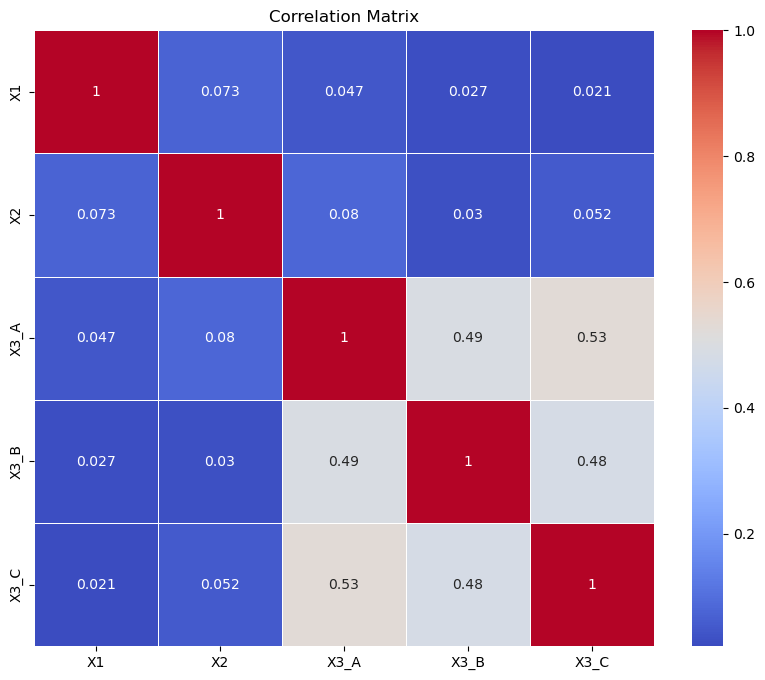

In [26]:
# QUESTION 3: Feature selection based on co-relation matrix

coefficients = X.corr().abs()
print(coefficients)

upper=coefficients.where(np.triu(np.ones(coefficients.shape),k=1).astype(bool))

to_drop=[columns for columns in upper.columns if(any(upper[columns]>0.8))]
print("List of columns to drop= ", to_drop)
print("Size of feature set before dropping")
print(X.shape)
X = X.drop(columns=to_drop)
print("Size of feature set after dropping")
print(X.shape)

plt.figure(figsize=(10, 8))
sns.heatmap(coefficients, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Decrease in Loss as Gradient descent progresses: 
[177.90520658637973, 76.24779381723998, 33.432888583232426, 15.399742052571034, 7.8035377833543365, 4.602900680027096, 3.2534821549408424, 2.68371988921149, 2.4423212099348013, 2.339222410097035, 2.294377374491931, 2.274074323420262, 2.2641153624573906, 2.258520945878656, 2.2547727176472114, 2.2518100154553964, 2.2491860906344803, 2.2467127468975003, 2.244310678566797, 2.2419464399368536, 2.239605899675558, 2.2372830610408263, 2.2349753534699306, 2.232681649612544, 2.230401430194962, 2.2281344322979026, 2.225880501225805, 2.2236395281194836, 2.221411423679953, 2.2191961071006023, 2.2169935014044504, 2.2148035314789194, 2.2126261232467024, 2.2104612033150963, 2.2083086988268597, 2.2061685373959534, 2.2040406470790286, 2.2019249563619865, 2.1998213941528966, 2.197729889777589, 2.1956503729763965, 2.193582773901377, 2.1915270231137556, 2.1894830515814556, 2.18745079067669, 2.1854301721735774, 2.1834211282457763, 2.181423591464133, 2.179437

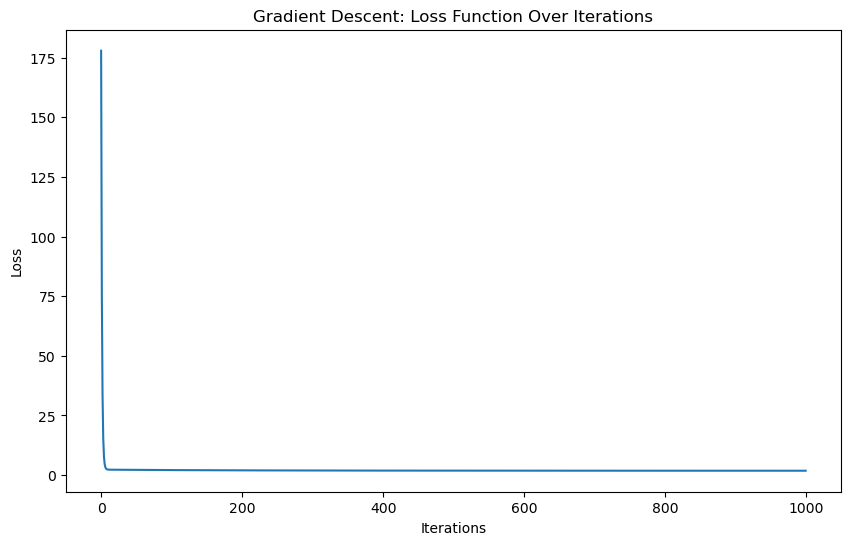

In [54]:
# QUESTION 4: Build Linear Regression Model from Scratch

# All features are selected
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a model 
class LinearRegressionModel:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.cost_history = []

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.theta = np.zeros(num_features)  # Initialize theta with zeros

        for _ in range(self.num_iterations):
            # Compute predictions
            predictions = X.dot(self.theta)

            # Compute gradients
            error = predictions - y
            gradient = X.T.dot(error) / num_samples

            # Update theta using gradient descent
            self.theta -= self.learning_rate * gradient
            
            cost = (1/(2*num_samples)) * np.sum((error) ** 2)
            self.cost_history.append(cost)

    def predict(self, X):
        return X.dot(self.theta)

# Initialise the Model: 
# model2 made from scratch while model1 is from pythons library
model2 = LinearRegressionModel(learning_rate=0.01, num_iterations=1000)
model1 = LinearRegression()

# TRAIN
model2.fit(X_train, y_train)
model1.fit(X_train, y_train)

# GET Y_PRED
y_pred2 = model2.predict(X_test)
y_pred1 = model1.predict(X_test)

print("Decrease in Loss as Gradient descent progresses: ")
print(model2.cost_history)
plt.figure(figsize=(10, 6))
plt.plot(range(model2.num_iterations), model2.cost_history)
plt.title("Gradient Descent: Loss Function Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


In [55]:
#QUESTION 5: Model Evaluation
mae2 = np.abs(y_test - y_pred2).mean()
mse2 = ((y_test - y_pred2) ** 2).mean()
rmse2 = np.sqrt(mse2)
print("Mean Absolute Error: ",mae2)
print("Mean Squared Error: ",mse2)
print("R Squared Error: ",rmse2)

mae1 = np.abs(y_test - y_pred1).mean()
mse1 = ((y_test - y_pred1) ** 2).mean()
rmse1 = np.sqrt(mse1)



Mean Absolute Error:  1.71511920634073
Mean Squared Error:  4.547392187075927
R Squared Error:  2.1324615323789375


In [56]:
# QUESTION 6. Model Interpretation: 
#  Interpret the coefficients of the linear regression
print("Coefficeints of Linear regression model: ")
print(model2.theta)

Coefficeints of Linear regression model: 
X1      3.010739
X2      1.939450
X3_A   -0.066712
X3_B   -0.082384
X3_C    0.370290
dtype: float64


In [57]:
# QUESTION 7. Predictions: 
#  Use the trained model to make sales revenue predictions for new scenarios 
new_data = pd.DataFrame({
    'X1': [10.5, 12.3, 8.7],
    'X2': [1, 0, 1],
    'X3': ['A', 'B', 'C']
})
new_data_encoded = pd.get_dummies(new_data, columns=['X3'])
new_predictions = new_data_encoded.dot(model2.theta)
new_data['y_pred'] = new_predictions
print("Using trained model to make sales revenue predictions for new model: ")
print(new_data)


Using trained model to make sales revenue predictions for new model: 
     X1  X2 X3     y_pred
0  10.5   1  A  33.485497
1  12.3   0  B  36.949705
2   8.7   1  C  28.503169


# Report




